Phishing Email Detection

In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
file_path = r"C:\Users\abtsn\OneDrive\Documents\GitHub\projects\cn\Phishing_Email.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
df.head()


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [57]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
missing_values


Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [62]:
# Display the columns of the dataset
df.columns


Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [66]:
# Extract relevant features
# Adjust features based on the dataset columns
features = df[['Email Text']]


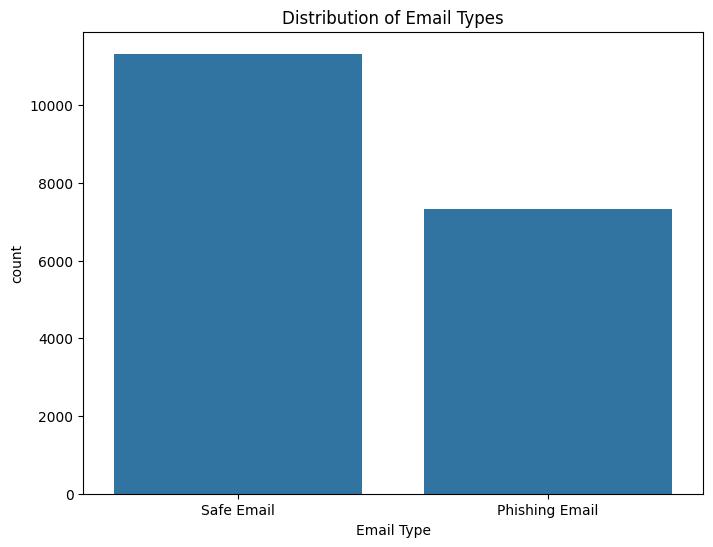

In [69]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Bar plot for Email Type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Email Type', data=df)
plt.title('Distribution of Email Types')
plt.show()


In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features['Email Text'], df['Email Type'], test_size=0.2, random_state=42)

# Fill NaN values in 'Email Text' with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Vectorize the content using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [73]:
# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_vectorized)


In [74]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)


Accuracy: 0.97

Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.95      0.97      0.96      1457
    Safe Email       0.98      0.97      0.97      2273

      accuracy                           0.97      3730
     macro avg       0.96      0.97      0.96      3730
  weighted avg       0.97      0.97      0.97      3730



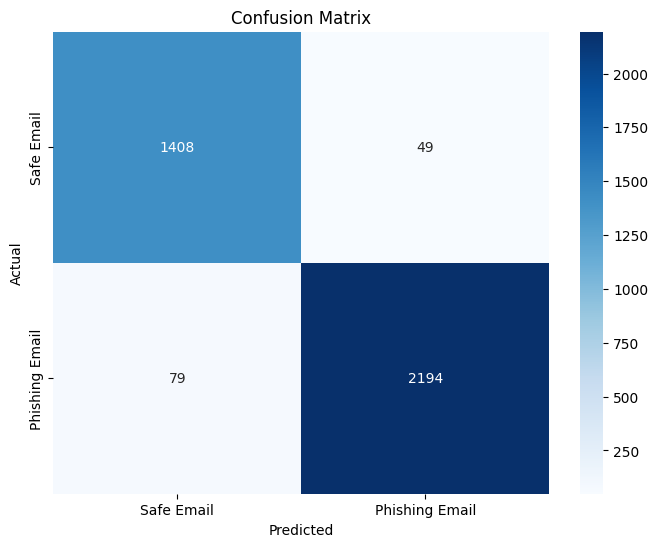

In [75]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Email Type'].unique(), yticklabels=df['Email Type'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
